In [8]:
"""
Используйте данные о зарплате работников и создайте модель регрессии
для прогнозирования зарплаты на основе опыта работы и образования.
"""

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from scipy.stats import skew
import pandas as pd

In [12]:
path_to_dataset = '/Users/anastasiyafostiy/.cache/kagglehub/datasets/mohithsairamreddy/' \
                  'salary-data/versions/4/Salary_Data.csv'

data = pd.read_csv(path_to_dataset)
data = pd.get_dummies(data, columns=['Education Level'])    # преобразует категориальный признак "Education Level" в набор бинарных переменных
data["School"] = data["Education Level_High School"]
data["Bachelor"] = data["Education Level_Bachelor's"] | data["Education Level_Bachelor's Degree"]
data["Master"] = data["Education Level_Master's"] | data["Education Level_Master's Degree"]
data["PhD"] = data["Education Level_PhD"] | data["Education Level_phD"]
data.drop(columns=[
    "Education Level_Bachelor's", "Education Level_Bachelor's Degree", "Education Level_Master's",
    "Education Level_Master's Degree", "Education Level_PhD", "Education Level_phD", "Education Level_High School",
    "Age", "Gender", "Job Title"
], inplace=True)
data.dropna(inplace=True)   # удаляет строки с пропущенными значениями

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 6699 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6699 non-null   float64
 1   Salary               6699 non-null   float64
 2   School               6699 non-null   bool   
 3   Bachelor             6699 non-null   bool   
 4   Master               6699 non-null   bool   
 5   PhD                  6699 non-null   bool   
dtypes: bool(4), float64(2)
memory usage: 183.2 KB
None


In [13]:
print(data['Salary'].describe())

count      6699.000000
mean     115326.964771
std       52786.183911
min         350.000000
25%       70000.000000
50%      115000.000000
75%      160000.000000
max      250000.000000
Name: Salary, dtype: float64


In [15]:
print("skew:", skew(data['Salary'])) # оценка асимметрии распределения зарплат.

skew: 0.05733108263916555


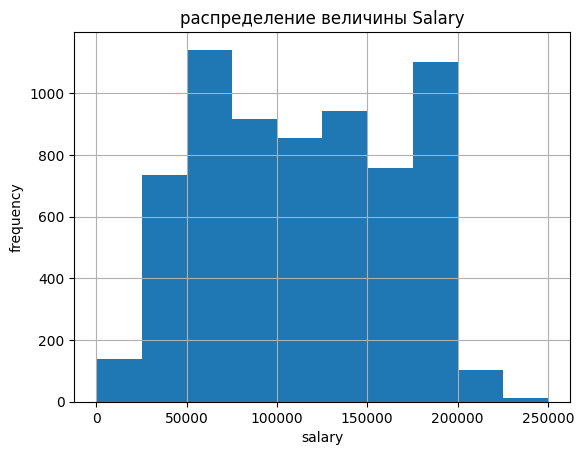

In [19]:
data['Salary'].hist()
plt.title('распределение величины Salary')
plt.xlabel('salary')
plt.ylabel('frequency')
plt.show()

In [17]:
X = data.drop(columns=['Salary'])
y = data['Salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(
    n_estimators=200,  # количество деревьев в лесу
    max_depth=10,  # максимальная глубина дерева, чтобы предотвратить переобучение
    min_samples_leaf=5,  # минимальное количество образцов, которые должны содержаться в листе, для стабильности модели
    max_samples=0.8,  # для каждого дерева будет использовано 80% обучающих данных, что помогает добиться большей устойчивости модели
    random_state=42,  # для воспроизводимости результатов
    n_jobs=-1  # использование всех доступных процессорных ядер для ускорения обучения
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [18]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

MAE: 18105.03344492106
MSE: 577473039.0277994
R2: 0.7968760122652805


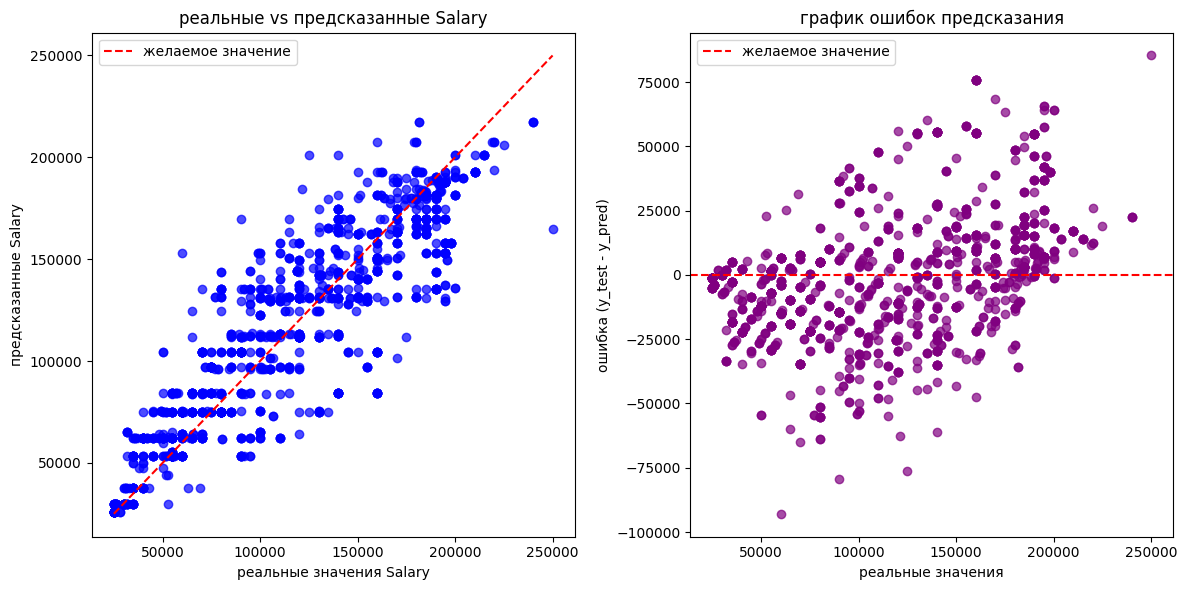

In [20]:
delta = y_test - y_pred

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(y_test, y_pred, alpha=0.7, color="blue")
axs[0].plot(
    [min(y_test), max(y_test)], [min(y_test), max(y_test)],
    color="red", linestyle="dashed", label="желаемое значение"
)
axs[0].set_xlabel("реальные значения Salary")
axs[0].set_ylabel("предсказанные Salary")
axs[0].set_title("реальные vs предсказанные Salary")
axs[0].legend()

axs[1].scatter(y_test, delta, alpha=0.7, color="purple")
axs[1].axhline(y=0, color="red", linestyle="dashed", label="желаемое значение")
axs[1].set_xlabel("реальные значения")
axs[1].set_ylabel("ошибка (y_test - y_pred)")
axs[1].set_title("график ошибок предсказания")
axs[1].legend()

plt.tight_layout()
plt.show()